# 02b - Torus Segmentation Demo

This notebook demonstrates mesh segmentation using a torus geometry. The torus has genus = 1 (one hole), which creates multiple segments in middle slices.

 - [Return to Index](01_tutorial_index.ipynb)

In [2]:
from discos import create_demo_neuron_mesh, MeshSegmenter, MeshManager
import trimesh
import numpy as np
import matplotlib.pyplot as plt

## Create and Visualize Demo Neuron Mesh

In [3]:
neuron = create_demo_neuron_mesh()

neuron = MeshManager(neuron)
neuron.print_mesh_analysis()
neuron.visualize_mesh_slice_interactive()


Mesh Analysis Report

Geometry:
  * Vertices: 320
  * Faces: 636
  * Components: 1
  * Volume: 6817.91
  * Bounds: [-26.7, -26.7, -100.0] to [26.7, 26.7, 51.2]

Mesh Quality:
  * Watertight: True
  * Winding Consistent: True
  * Normal Direction: outward
  * Duplicate Vertices: 0
  * Degenerate Faces: 0

Topology:
  * Genus: 0
  * Euler Characteristic: 2

No issues detected

Recommendation:
  Mesh appears to be in good condition.


## Segment the Mesh

In [6]:
# Create segmenter and segment the mesh
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(neuron.mesh, slice_height=9, min_volume=0.1)

print(f"Segmentation complete!")
print(f"Total segments: {len(segments)}")
print(f"Total slices: {len(segmenter.slices)}")

✅ Validated single-hull mesh: 636 external faces, volume=6817.908
Computing 16 cross-sections from z=-100.00 to z=51.23
  Cross-section 0: z=-91.00, 28 line segments, area=0.000
  Cross-section 1: z=-82.00, 28 line segments, area=0.000
  Cross-section 2: z=-73.00, 28 line segments, area=0.000
  Cross-section 3: z=-64.00, 28 line segments, area=0.000
  Cross-section 4: z=-55.00, 28 line segments, area=0.000
  Cross-section 5: z=-46.00, 28 line segments, area=0.000
  Cross-section 6: z=-37.00, 28 line segments, area=0.000
  Cross-section 7: z=-28.00, 28 line segments, area=0.000
  Cross-section 8: z=-19.00, 28 line segments, area=0.000
  Cross-section 9: z=-10.00, 28 line segments, area=0.000
  Cross-section 10: z=-1.00, 46 line segments, area=0.000
  Cross-section 11: z=8.00, 70 line segments, area=0.000
  Cross-section 12: z=17.00, 136 line segments, area=0.000
  Cross-section 13: z=26.00, 136 line segments, area=0.000
  Cross-section 14: z=35.00, 136 line segments, area=0.000
  Cross-

## SegmentGraph

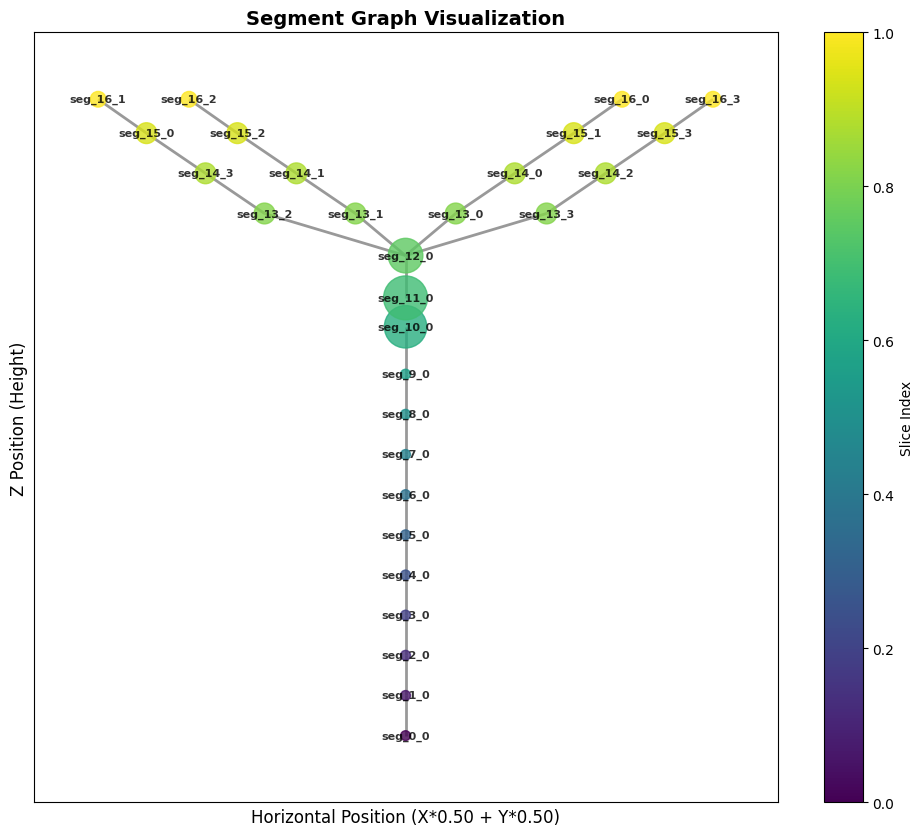

In [7]:
graph = segmenter.get_segment_graph()
_ = graph.visualize(repulsion_strength=0.0)

## Summary

The torus segmentation demonstrates:
- **Complex topology**: Middle slices contain multiple segments due to the hole
- **Ring connectivity**: Segments form a circular arrangement in 3D space
- **Genus = 1 handling**: Algorithm correctly identifies separate connected components within slices
- **Spatial relationships**: 3D visualization reveals the donut structure

This showcases the algorithm's ability to handle complex topologies with holes.